# 텍스트 클라우드

In [4]:
# !pip install wordcloud

In [2]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud as WC

## 영문 텍스트

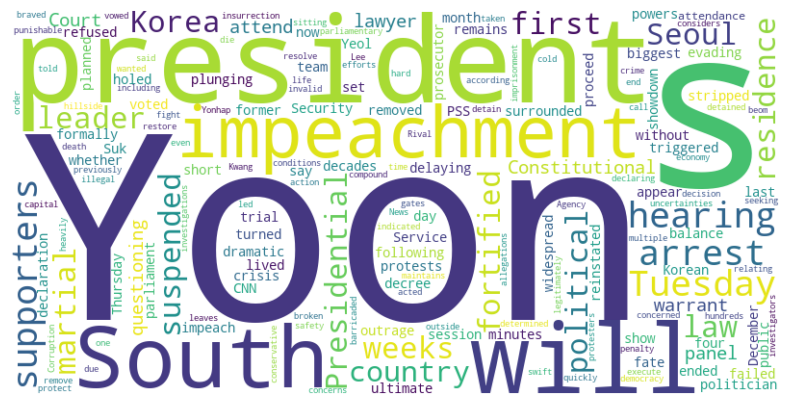

In [9]:
text = '''
Seoul, South Korea
CNN
 — 
South Korean President Yoon Suk Yeol’s fate remains in the balance after the suspended leader failed to appear at the first day of his impeachment trial Tuesday following weeks of evading arrest, delaying what is set to be a dramatic political showdown.

Yoon has been holed up in his fortified residence, surrounded by his Presidential Security Service (PSS) team, after his short-lived declaration of martial law in December triggered widespread public outrage and protests, plunging the country into its biggest political crisis in decades.

The former prosecutor-turned-politician was stripped of his presidential powers last month after parliament voted to impeach him over the decree. The country’s Constitutional Court now has the ultimate say over whether he will be formally removed or reinstated.

Tuesday’s court session ended after just four minutes when the president refused to show. However, a hearing planned for Thursday will proceed with or without Yoon in attendance.

The parliamentary impeachment panel is seeking “a swift decision to remove the president to restore broken democracy, constitutional order, and to quickly resolve the uncertainties in the economy,” said Lee Kwang-beom, one of the panel’s lawyers.

Yoon had previously indicated through his lawyer that he would not attend Tuesday’s hearing due to safety concerns relating to efforts to detain him for questioning, according to South Korea’s Yonhap News Agency.

Yoon is wanted for questioning in multiple investigations, including allegations he led an insurrection – a crime punishable by life imprisonment or even the death penalty.

Yoon maintains he acted legitimately in declaring martial law and considers the warrant “illegal and invalid.” He has told his supporters he will “fight until the end.”

For weeks, the suspended leader has barricaded himself in his heavily-fortified hillside compound in the capital Seoul, while outside the gates hundreds of his die-hard conservative supporters have vowed to protect him.

Supporters are concerned Yoon will be detained if he leaves his residence to attend the impeachment hearings. Rival protesters have also braved cold conditions to call for his arrest.

Corruption investigators are determined to execute the arrest warrant against Yoon – the first time such action has been taken against a sitting president.
'''

# 워드클라우드 생성(generate)
wordcloud = WC(width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화(plt)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./image/wordcloud.png')
plt.show()

## 한글 텍스트

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

plt.style.use('fivethirtyeight')

# D2Coding 폰트 설정
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

# 마이너스 부호 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

from wordcloud import WordCloud as WC
from konlpy.tag import Komoran

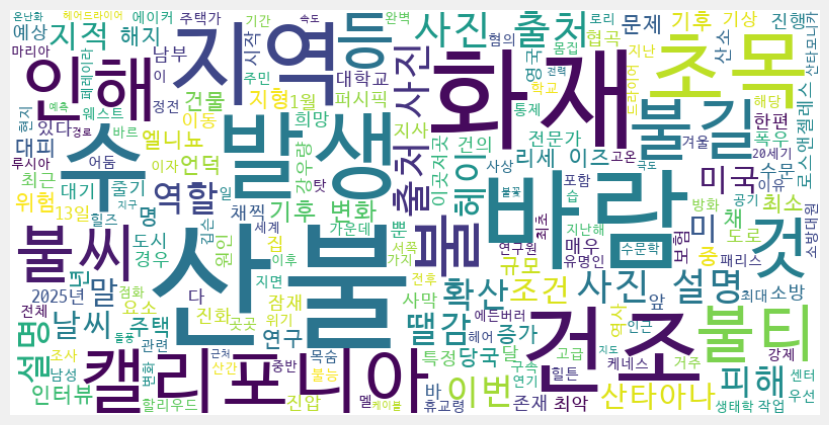

In [31]:
import requests as req
url = 'https://www.bbc.com/korean/articles/cy8x90lplk9o'
headers = { 'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:133.0) Gecko/20100101 Firefox/133.0' }
res = req.get(url, headers=headers)

from bs4 import BeautifulSoup as bs
soup = bs(res.content, 'html.parser')

text = soup.select_one('#root #main-wrapper main').text
# print(text[:200], '\n', text[-200:])

text = text.replace(r'[\n|\t]', '')
data = [i for i in text if bool(i.rstrip())]
komo = Komoran()
nouns = komo.nouns(text)
nouns_txt = ' '.join(nouns)

# 워드클라우드 생성(generate)
wordcloud = WC(width=800, height=400, background_color='white', font_path=d2coding_path).generate(nouns_txt)

# 워드클라우드 시각화(plt)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./image/wordcloudHangeul.png')
plt.show()

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup as bs
from datetime import datetime
import time


# Chrome 옵션 설정
options = Options()
options.binary_location = '/usr/local/bin/chrome-headless-shell' # 크롬 브라우저 경로
# options.add_argument('--headless')
options.add_argument('--no-sandbox') # 실행 가드? 해제
options.add_argument('--disable-dev-shm-usage') # 공유 메모리 비활성화
options.add_argument('--disable-gpu') # GPU 비활성화
options.add_argument('--window-size=1920,1080') # 가상 화면크기 설정
# ChromeDriver 설정
# service = Service('/usr/local/bin/chromedriver')
service = webdriver.ChromeService() # executable_path='/usr/local/bin/chromedriver'
driver = webdriver.Chrome(service=service, options=options)

url = 'https://sillok.history.go.kr/main/main.do'
# selector = '#cont_area > div.cont_in_left.cont_full > div.ins_view_wrap.clear2 > div > dl'
driver.get(url)
driver.quit()

path = './dataset/sejong.txt'
with open(file=path, mode='r', encoding='utf-8') as o:
    data = o.readlines()

# text = text.replace(r'[\n|\t]', '')
komo = Komoran()
combined = ' '.join(data)
nouns = komo.nouns(combined)
filtered = [i for i in nouns if len(i) > 1]
nouns_txt = ' '.join(filtered)

# 워드클라우드 생성(generate)
wordcloud = WC(width=800, height=400, background_color='white', font_path=d2coding_path).generate(nouns_txt)

# 워드클라우드 시각화(plt)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./image/wordcloudSillok.png')
plt.show()

ReadTimeoutError: HTTPConnectionPool(host='localhost', port=60511): Read timed out. (read timeout=120)